**Thresholding**

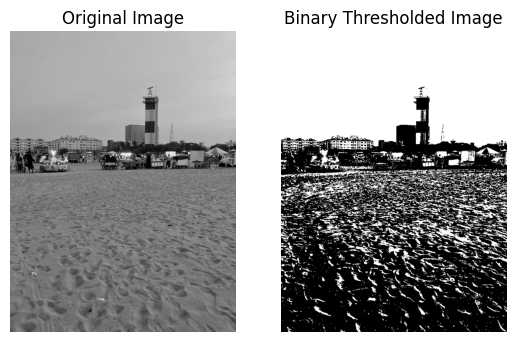

In [6]:
import cv2
import matplotlib.pyplot as plt

# Load image in grayscale
image = cv2.imread('lighthouse.jpg', cv2.IMREAD_GRAYSCALE)

# Apply binary thresholding
threshold_value = 128  # Adjust as needed
_, binary_image = cv2.threshold(image, threshold_value, 255, cv2.THRESH_BINARY)

plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(image, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Binary Thresholded Image')
plt.imshow(binary_image, cmap='gray')
plt.axis('off')

plt.show()


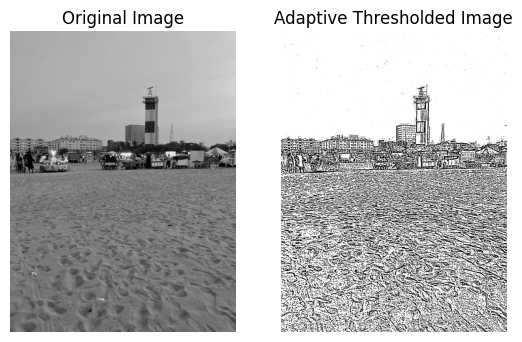

In [7]:
# Apply adaptive thresholding
block_size = 11  # Size of the neighborhood for threshold calculation
constant = 2     # Constant subtracted from the mean or weighted mean
adaptive_threshold_image = cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, block_size, constant)

plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(image, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Adaptive Thresholded Image')
plt.imshow(adaptive_threshold_image, cmap='gray')
plt.axis('off')

plt.show()


**Edge Detection - Canny and Sobel**

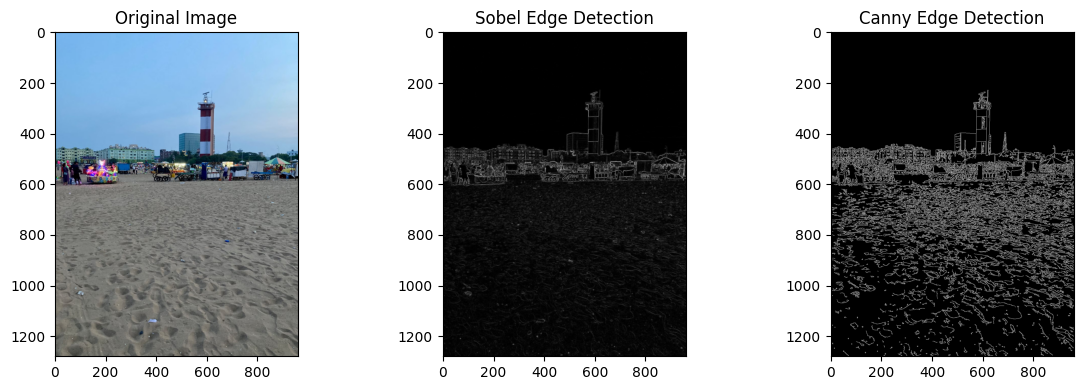

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('lighthouse.jpg')

# Convert the image to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply the Sobel operator
sobel_x = cv2.Sobel(gray_image, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(gray_image, cv2.CV_64F, 0, 1, ksize=3)
sobel_combined = np.sqrt(sobel_x**2 + sobel_y**2)

# Convert the Sobel result to uint8 for display
sobel_result = np.uint8(255 * sobel_combined / np.max(sobel_combined))

# Apply the Canny edge detector
canny_edges = cv2.Canny(gray_image, 50, 150)

# Display the images with labels
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')

plt.subplot(1, 3, 2)
plt.imshow(sobel_result, cmap='gray')
plt.title('Sobel Edge Detection')

plt.subplot(1, 3, 3)
plt.imshow(canny_edges, cmap='gray')
plt.title('Canny Edge Detection')

plt.tight_layout()
plt.show()


**Region Based Segmentation**

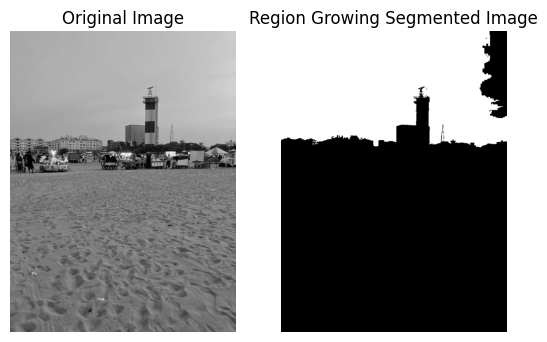

In [14]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('lighthouse.jpg', cv2.IMREAD_GRAYSCALE)  # Load as grayscale

# Function for region growing segmentation
def region_growing(image, seed):
    rows, cols = image.shape
    segmented = np.zeros_like(image)
    visited = np.zeros_like(image)
    stack = [seed]

    while stack:
        current_pixel = stack.pop()
        x, y = current_pixel

        if 0 <= x < rows and 0 <= y < cols and not visited[x, y]:
            if abs(int(image[x, y]) - int(image[seed])) < 30:  # Adjust the intensity difference threshold
                segmented[x, y] = 255
                visited[x, y] = 1

                # Add neighboring pixels to the stack
                stack.append((x + 1, y))
                stack.append((x - 1, y))
                stack.append((x, y + 1))
                stack.append((x, y - 1))

    return segmented

# Choose a seed point (coordinates) for region growing
seed_point = (100, 100)

# Apply region growing segmentation
segmented_image = region_growing(image, seed_point)

# Display the images
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(image, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Region Growing Segmented Image')
plt.imshow(segmented_image, cmap='gray')
plt.axis('off')

plt.show()


**Graph Based Segmentation**

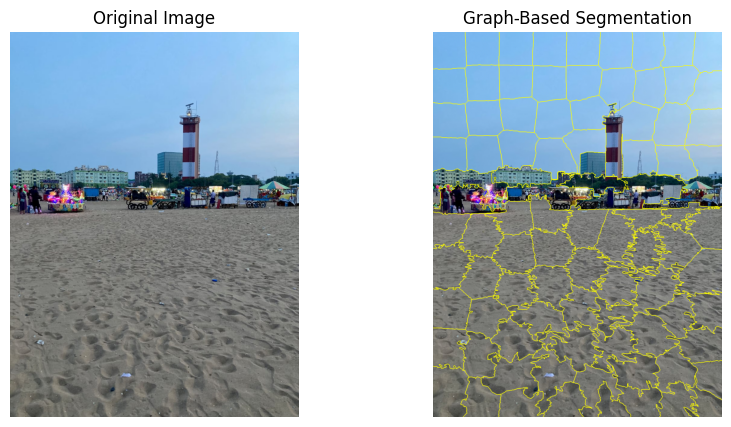

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import segmentation, color
from skimage import io

# Load image
image = io.imread('lighthouse.jpg')

# Convert image to grayscale
gray_image = color.rgb2gray(image)

# Apply graph-based segmentation (Normalized Cut)
segments = segmentation.slic(image, n_segments=100, compactness=10, sigma=1)

# Display the original image and segmented image
fig, ax = plt.subplots(1, 2, figsize=(10, 5), sharex=True, sharey=True)

ax[0].imshow(image)
ax[0].set_title('Original Image')
ax[0].axis('off')

ax[1].imshow(segmentation.mark_boundaries(image, segments))
ax[1].set_title('Graph-Based Segmentation')
ax[1].axis('off')

plt.show()


**Contour Based Segmentation**

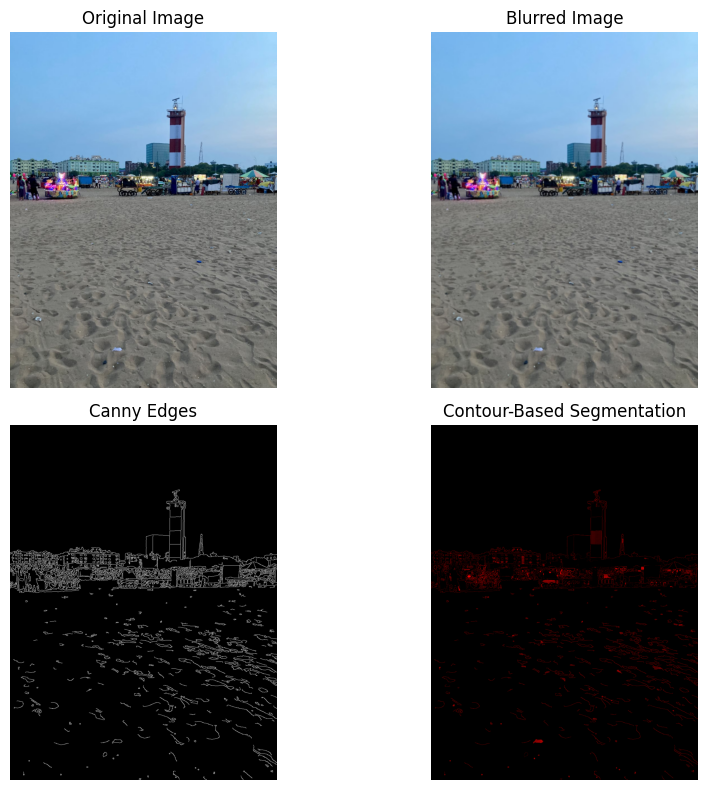

In [16]:
# Apply Gaussian blur to reduce noise and improve contour detection
blurred_image = cv2.GaussianBlur(image, (5, 5), 0)

# Apply Canny edge detection to find edges in the image
edges = cv2.Canny(blurred_image, 50, 150)

# Find contours in the edge-detected image
contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Create an empty mask to draw the contours
contour_mask = np.zeros_like(image)
cv2.drawContours(contour_mask, contours, -1, (255), thickness=cv2.FILLED)

segmented_image = cv2.bitwise_and(image, contour_mask)

cv2.imwrite('segmented_image.jpg', segmented_image)

plt.figure(figsize=(10, 8))

plt.subplot(2, 2, 1)
plt.title('Original Image')
plt.imshow(image, cmap='gray')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.title('Blurred Image')
plt.imshow(blurred_image, cmap='gray')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.title('Canny Edges')
plt.imshow(edges, cmap='gray')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.title('Contour-Based Segmentation')
plt.imshow(segmented_image, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()


**Morphological Operations**

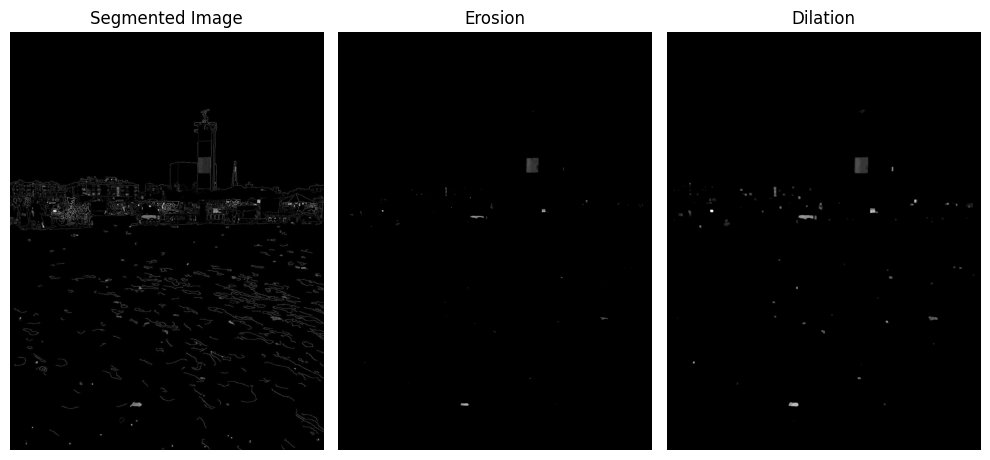

In [17]:
# Load the segmented image
segmented_image = cv2.imread('segmented_image.jpg', cv2.IMREAD_GRAYSCALE)

# Apply morphological operations (erosion and dilation)
kernel_size = 5
kernel = np.ones((kernel_size, kernel_size), np.uint8)

# Erosion
eroded_image = cv2.erode(segmented_image, kernel, iterations=1)

# Dilation
dilated_image = cv2.dilate(eroded_image, kernel, iterations=1)

plt.figure(figsize=(10, 5))

plt.subplot(1, 3, 1)
plt.title('Segmented Image')
plt.imshow(segmented_image, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title('Erosion')
plt.imshow(eroded_image, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title('Dilation')
plt.imshow(dilated_image, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()


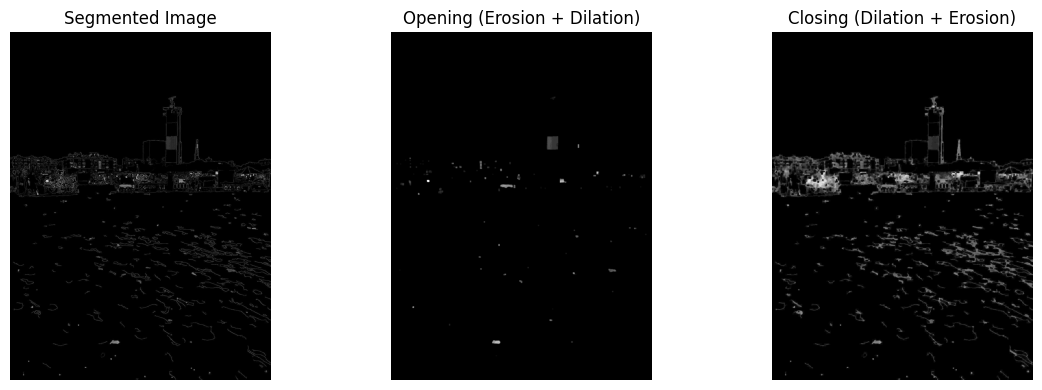

In [18]:
# Load the segmented image
segmented_image = cv2.imread('segmented_image.jpg', cv2.IMREAD_GRAYSCALE)

# Define the kernel for morphological operations
kernel_size = 5
kernel = np.ones((kernel_size, kernel_size), np.uint8)

# Opening operation (erosion followed by dilation)
opened_image = cv2.morphologyEx(segmented_image, cv2.MORPH_OPEN, kernel)

# Closing operation (dilation followed by erosion)
closed_image = cv2.morphologyEx(segmented_image, cv2.MORPH_CLOSE, kernel)

plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.title('Segmented Image')
plt.imshow(segmented_image, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title('Opening (Erosion + Dilation)')
plt.imshow(opened_image, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title('Closing (Dilation + Erosion)')
plt.imshow(closed_image, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()
